In [9]:
import sys; sys.path.append('../..') # Add source directory
import seaborn as sns
import numpy as np

from bike_sharing_demand.data import BikeRentalDataFrame

In [10]:
df = BikeRentalDataFrame()
df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,
2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,0,1,1,15.58,19.695,50,26.0027,336
2012-12-19 20:00:00,0,1,1,14.76,17.425,57,15.0013,241
2012-12-19 21:00:00,0,1,1,13.94,15.910,61,15.0013,168


In [11]:
df.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='datetime', length=10886)

In [12]:
df["hour"] = df.index.hour
df["weekend"] = df.index.weekday.isin([5, 6])
df["weekday"] = df.index.weekday

df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,weekend,weekday
datetime,,,,,,,,,,,
2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0000,16,0,True,5
2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0000,40,1,True,5
2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0000,32,2,True,5
2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0000,13,3,True,5
2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0000,1,4,True,5
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,0,1,1,15.58,19.695,50,26.0027,336,19,False,2
2012-12-19 20:00:00,0,1,1,14.76,17.425,57,15.0013,241,20,False,2
2012-12-19 21:00:00,0,1,1,13.94,15.910,61,15.0013,168,21,False,2


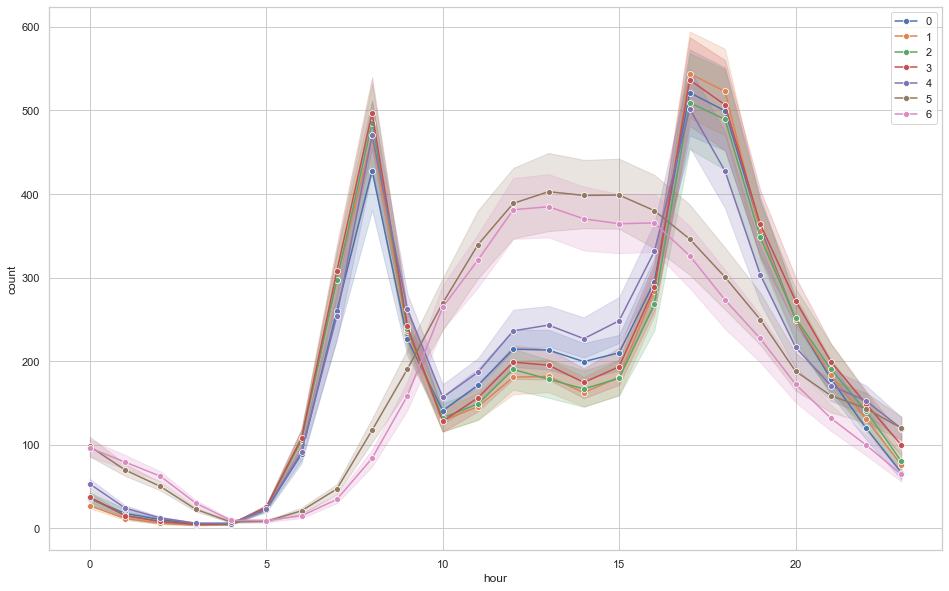

In [14]:
sns.set(rc={'figure.figsize':(16,10)}, style="whitegrid")

for i in range(7):
    sns.lineplot(data=df[df["weekday"]==i], x="hour", y="count", marker="o", label=i)

In [15]:
bumped_hours = df.bump_hours()

In [16]:
bumped_hours

,rbf_hour_0,rbf_hour_1,rbf_hour_2,rbf_hour_3,rbf_hour_4,rbf_hour_5,rbf_hour_6,rbf_hour_7,rbf_hour_8,rbf_hour_9,...,rbf_hour_14,rbf_hour_15,rbf_hour_16,rbf_hour_17,rbf_hour_18,rbf_hour_19,rbf_hour_20,rbf_hour_21,rbf_hour_22,rbf_hour_23
0,0.367879,0.344154,0.263597,0.101701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.344154,0.367879,0.344154,0.263597,0.101701,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.263597,0.344154,0.367879,0.344154,0.263597,0.101701,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.101701,0.263597,0.344154,0.367879,0.344154,0.263597,0.101701,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.101701,0.263597,0.344154,0.367879,0.344154,0.263597,0.101701,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.101701,0.263597,0.344154,0.367879,0.344154,0.263597,0.101701,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.101701,0.263597,0.344154,0.367879,0.344154,0.263597,0.101701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.101701,0.263597,0.344154,0.367879,0.344154,0.263597,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.101701,0.263597,0.344154,0.367879,0.344154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101701,0.263597,0.344154,0.367879,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


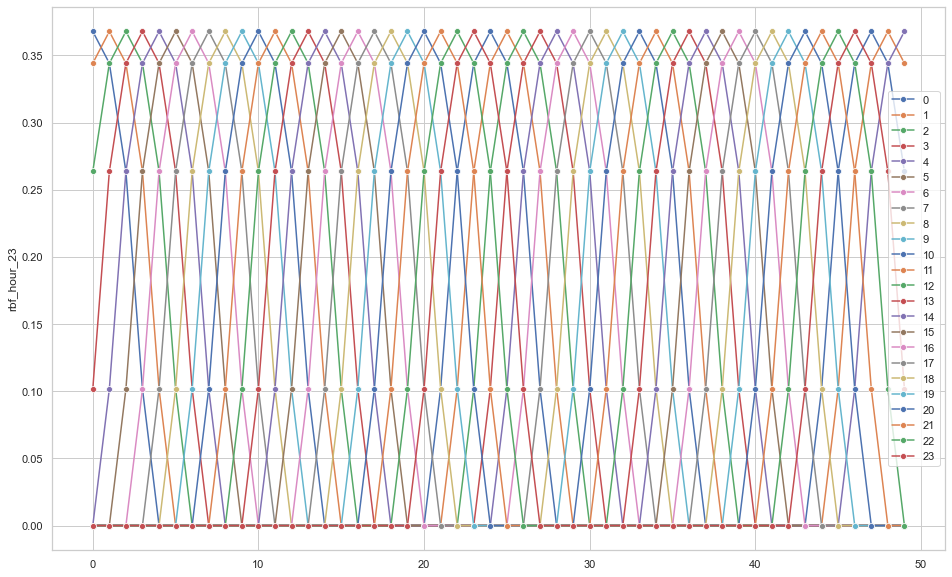

In [18]:
for i in range(24):
    sns.lineplot(data=bumped_hours, x=bumped_hours.index, y=f"rbf_hour_{i}", marker="o", label=i)

In [7]:
def rbf(x, width, mean):
    return np.exp(-(x - mean)**2 / (2 * width))
def rbf_transform(df, freq, width):
    """Returns RBF-encoded features"""
    x = np.arange(df.shape[0])
    for i in range(0, freq):
        df[f'rbf_{i}'] = 0
        j = -freq
        while j <= df.shape[0]:
            df[f'rbf_{i}'] += rbf(x, width, i + j)
            j += freq

In [8]:
rbf_transform(df, 24, 2) 